In [1]:
# First we load our location data and drop any duplicated places within documents
import pandas as pd
df = pd.read_feather("data/included_studies.feather")
df.head()

,id,content,title,0 - relevant,2 - 1.02. Changes in temperature,2 - 1.03. Seasonal change,2 - 1.04. Changes in precipitation,2 - 1.06. Climate change (unspecified),2 - 1.07. Other meteorological variables,3 - 2.01. Food security,...,4 - 2.04. Extreme event attribution,4 - 2.05. Scenarios,5 - 4.01. Floods and drought,5 - 4.02. Heatwaves,5 - 4.03. Wildfires,5 - 4.04. Other extreme events,5 - 4.05. Extreme cold,6 - 5.01. Pollution,6 - 5.03. Reduced agricultural & aquaculture productivity,6 - 5.04. Reduced labour and physical capacity
0,20881,"Climate change will result in more intense, mo...",Projections of heat waves with high impact on ...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,27158,"Temperature, a key climate change indicator, i...",Apparent Temperature and Cause-Specific Mortal...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,30042,Climate change has led to significant rise of ...,Climate Change and the Emergent Epidemic of CK...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30687,BACKGROUND: The periods of fetal and child dev...,Children are likely to suffer most from our fo...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,35987,Background Extreme precipitation events are in...,Autochthonous Chikungunya Transmission and Ext...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
grid_df = pd.read_csv('data/grid_df.csv')
for orig_var in ["temp_da", "precip_da"]:
    simp_var = f"{orig_var}_simplified"
    grid_df[simp_var] = grid_df[orig_var]
    grid_df.loc[grid_df[orig_var].isin([2,3]), simp_var] = 1
    grid_df.loc[grid_df[orig_var].isin([-2,-3]), simp_var] = -1
    grid_df.loc[grid_df[orig_var].isin([-4, 4]), simp_var] = 0
grid_df.head()

,index,LAT,LON,area,is_land,precip_da,temp_da,population,temp_da_simplified,precip_da_simplified
0,0,-88.75,-178.75,1685.654015,False,NaN,NaN,0.0,NaN,NaN
1,1,-88.75,-176.25,1685.654015,False,NaN,NaN,0.0,NaN,NaN
2,2,-88.75,-173.75,1685.654015,False,NaN,NaN,0.0,NaN,NaN
3,3,-88.75,-171.25,1685.654015,False,NaN,NaN,0.0,NaN,NaN
4,4,-88.75,-168.75,1685.654015,False,NaN,NaN,0.0,NaN,NaN


In [3]:
shp_df_matches = pd.read_csv("data/shp_df_matches.csv").merge(
    grid_df[["index","area","population","precip_da_simplified","temp_da_simplified"]], left_on="grid_df_id", right_on="index"
)
shp_df_matches

,grid_df_id,doc_id,shp_id,place,index,area,population,precip_da_simplified,temp_da_simplified
0,6281,5249722,1710.0,'asir region,6281,73170.065846,3306124.80,NaN,1.0
1,6281,5110789,1710.0,'asir region,6281,73170.065846,3306124.80,NaN,1.0
2,6281,1277951,67.0,kingdom of saudi arabia,6281,73170.065846,3306124.80,NaN,1.0
3,6281,774834,67.0,kingdom of saudi arabia,6281,73170.065846,3306124.80,NaN,1.0
4,6281,4933089,67.0,kingdom of saudi arabia,6281,73170.065846,3306124.80,NaN,1.0
...,...,...,...,...,...,...,...,...,...
2608931,1198,1417686,NaN,"tierra de o'higgins, península",1198,28005.883750,0.00,NaN,1.0
2608932,1198,4825584,NaN,"tierra de o'higgins, península",1198,28005.883750,0.00,NaN,1.0
2608933,612,4744765,NaN,west antarctica (or lesser antarctica),612,15074.788797,0.00,NaN,NaN
2608934,9272,4167422,NaN,greenland icecap,9272,24837.890473,0.00,NaN,NaN


In [4]:
df = df[df["id"].isin(shp_df_matches["doc_id"])].reset_index(drop=True)

In [5]:
def agg_da(data, x):
    total_area = data["area"].sum()
    attrib_area = data[data[x].isin([-1,1])]["area"].sum()
    return attrib_area / total_area


attrib_vars = ["temp_da_simplified","precip_da_simplified"]
attrib_drivers = ["2 - 1.02. Changes in temperature","2 - 1.04. Changes in precipitation"]
for i, driver in enumerate(attrib_drivers):
    driver_studies = df[df[driver]>=0.5]
    sub_shp = shp_df_matches[shp_df_matches["doc_id"].isin(driver_studies["id"])]
    var = attrib_vars[i]
    attrib = sub_shp.groupby("doc_id").apply(agg_da, var)
    attrib = attrib.to_frame(var).reset_index().rename(columns={"doc_id":"id"})
    if var not in df.columns:
        df = df.merge(attrib, how="outer").fillna(0)
df["attributable"] = df[attrib_vars].max(axis=1)
df.head()

,id,content,title,0 - relevant,2 - 1.02. Changes in temperature,2 - 1.03. Seasonal change,2 - 1.04. Changes in precipitation,2 - 1.06. Climate change (unspecified),2 - 1.07. Other meteorological variables,3 - 2.01. Food security,...,5 - 4.02. Heatwaves,5 - 4.03. Wildfires,5 - 4.04. Other extreme events,5 - 4.05. Extreme cold,6 - 5.01. Pollution,6 - 5.03. Reduced agricultural & aquaculture productivity,6 - 5.04. Reduced labour and physical capacity,temp_da_simplified,precip_da_simplified,attributable
0,27158,"Temperature, a key climate change indicator, i...",Apparent Temperature and Cause-Specific Mortal...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000
1,35987,Background Extreme precipitation events are in...,Autochthonous Chikungunya Transmission and Ext...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
2,49516,The article reviews the issue of climate chang...,Climate change and human health: Indian context,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.829895,0.0,0.829895
3,50776,Although interests in assessing the relationsh...,Assessing the relationship between global warm...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.760950,0.0,0.760950
4,54293,We have systematized the effects associated wi...,Climate change and its effects on urban spaces...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


In [6]:
attrib_df = df[df["attributable"]>0.1].reset_index(drop=True)
attrib_df.to_feather("data/attributable_df.feather")

In [7]:
import re
import numpy as np
clim = [x for x in attrib_df.columns if re.match("2 -",x)]
health = [x for x in attrib_df.columns if re.match("3 -",x)]
links = []
mat = np.zeros((len(clim),len(health)))
data = []
for i, c in enumerate(clim):
    for j, h in enumerate(health):
        n = attrib_df[
            (attrib_df[c]>=0.5) &
            (attrib_df[h]>=0.5)
        ].shape[0]
        cn = attrib_df[attrib_df[c]>=0.5].shape[0]
        hn = attrib_df[attrib_df[h]>=0.5].shape[0]
        mat[i,j] = n
        links.append({"source":i,"target":len(clim)+j,"n":n})
        data.append([
            n,
            f"{c.split('.')[2]} ({cn})",
            f"{h.split('.')[2]} ({hn})",
        ])

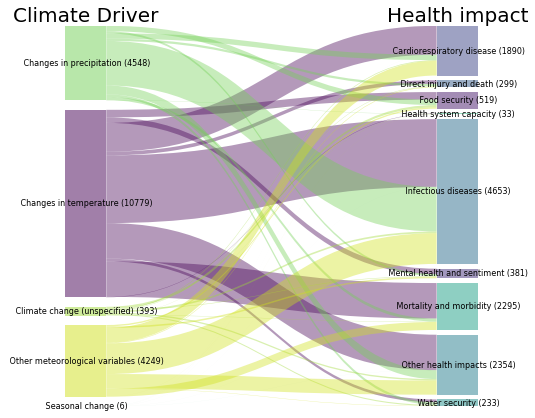

In [8]:
from mpl_sankey import sankey
import matplotlib.pyplot as plt
sdf = pd.DataFrame(data, columns=["Weight", "Climate Driver", "Health impact"])
plt.figure(figsize=(7.4, 7))
sankey(sdf, cmap=plt.get_cmap('viridis'),labels_size=8)

In [9]:
import re
import numpy as np
clim = [x for x in attrib_df.columns if re.match("2 -",x)]
health = [x for x in attrib_df.columns if re.match("3 -",x)]
links = []
mat = np.zeros((len(clim),len(health)))
data = []
for i, c in enumerate(clim):
    cn = df[df[c]>=0.5].shape[0]
    for j, h in enumerate(health):
        hn = df[df[h]>=0.5].shape[0]
        if c == '2 - 1.02. Changes in temperature':
            chdf = df[
                (df[c]>=0.5) &
                (df[h]>=0.5)
            ]
            n = df[
                (df[c]>=0.5) &
                (df[h]>=0.5) & 
                (df[attrib_vars[0]]>=0.1)
            ].shape[0]
            data.append([
                n,
                f"{c.split('.')[2]} ({cn})",
                "Attributable",
                f"{h.split('.')[2]} ({hn})",
            ])
            n = df[
                (df[c]>=0.5) &
                (df[h]>=0.5) & 
                (df[attrib_vars[0]]<=0.1)
            ].shape[0]
            data.append([
                n,
                f"{c.split('.')[2]} ({cn})",
                "Not attributable",
                f"{h.split('.')[2]} ({hn})",
            ])
            
        elif c== '2 - 1.04. Changes in precipitation':
            n = df[
                (df[c]>=0.5) &
                (df[h]>=0.5) & 
                (df[attrib_vars[1]]>=0.1)
            ].shape[0]
            data.append([
                n,
                f"{c.split('.')[2]} ({cn})",
                "Attributable",
                f"{h.split('.')[2]} ({hn})",
            ])
            n = df[
                (df[c]>=0.5) &
                (df[h]>=0.5) & 
                (df[attrib_vars[1]]<=0.1)
            ].shape[0]
            data.append([
                n,
                f"{c.split('.')[2]} ({cn})",
                "Not attributable",
                f"{h.split('.')[2]} ({hn})",
            ])
        else:
            
            n = df[
                (df[c]>=0.5) &
                (df[h]>=0.5)
            ].shape[0]
            
            data.append([
                n,
                f"{c.split('.')[2]} ({cn})",
                "Not attributable",
                f"{h.split('.')[2]} ({hn})",
            ])

In [10]:
df[attrib_vars[0]].fillna(0)

0        1.000000
1        0.000000
2        0.829895
3        0.760950
4        0.000000
           ...   
17679    1.000000
17680    1.000000
17681    0.760097
17682    0.000000
17683    0.000000
Name: temp_da_simplified, Length: 17684, dtype: float64

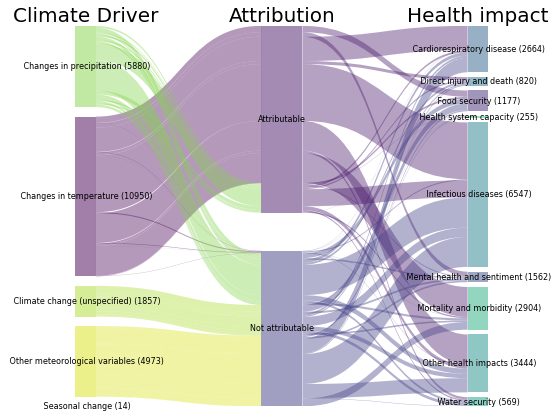

In [11]:
from mpl_sankey import sankey
import matplotlib.pyplot as plt
sdf = pd.DataFrame(data, columns=["Weight", "Climate Driver","Attribution", "Health impact"])
plt.figure(figsize=(7.4, 7))
sankey(sdf, cmap=plt.get_cmap('viridis'),labels_size=8)

In [12]:
c = '2 - 1.02. Changes in temperature'
attrib_dict = dict(zip(attrib_drivers, attrib_vars))
attrib_dict

{'2 - 1.02. Changes in temperature': 'temp_da_simplified',
 '2 - 1.04. Changes in precipitation': 'precip_da_simplified'}

In [13]:
import re
import numpy as np
clim = [x for x in attrib_df.columns if re.match("2 -",x)]
health = [x for x in attrib_df.columns if re.match("3 -",x)]
links = []
mat = np.zeros((len(clim),len(health)))
data = []
for i, c in enumerate(clim):
    cn = df[df[c]>=0.5].shape[0]
    for j, h in enumerate(health):
        hn = df[df[h]>=0.5].shape[0]
        chdf = df[
            (df[c]>=0.5) &
            (df[h]>=0.5)
        ]
        if c in attrib_drivers:
            n = chdf[chdf[attrib_dict[c]]>=0.1].shape[0]
            data.append([
                n,
                f"{c.split('.')[2]} ({cn})",
                "Attributable",
                f"{h.split('.')[2]} ({hn})",
            ])
            n = chdf[chdf[attrib_dict[c]]<0.1].shape[0]
            data.append([
                n,
                f"{c.split('.')[2]} ({cn})",
                "Not attributable",
                f"{h.split('.')[2]} ({hn})",
            ])
        else:
            data.append([
                chdf.shape[0],
                f"{c.split('.')[2]} ({cn})",
                "NA",
                f"{h.split('.')[2]} ({hn})",
            ])            


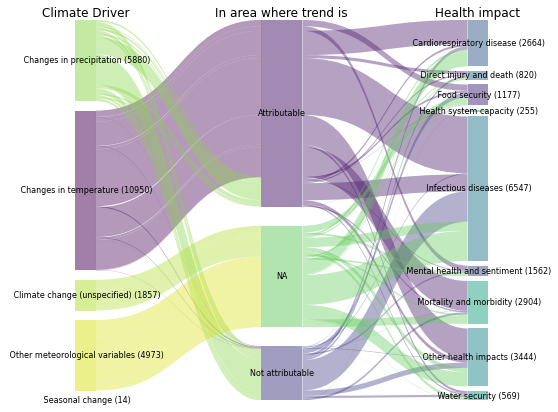

In [14]:
from mpl_sankey import sankey
import matplotlib.pyplot as plt
sdf = pd.DataFrame(data, columns=["Weight", "Climate Driver","In area where trend is", "Health impact"])
plt.figure(figsize=(7.4, 7))
sankey(sdf, cmap=plt.get_cmap('viridis'),labels_size=8, titles_size=12)

In [15]:
import re
import numpy as np
clim = [x for x in attrib_df.columns if re.match("2 -",x)]
health = [x for x in attrib_df.columns if re.match("3 -",x)]
links = []
mat = np.zeros((len(clim),len(health)))
data = []
for i, c in enumerate(clim):
    cn = df[df[c]>=0.5].shape[0]
    for j, h in enumerate(health):
        hn = df[df[h]>=0.5].shape[0]
        chdf = df[
            (df[c]>=0.5) &
            (df[h]>=0.5)
        ]
        if c in attrib_drivers:
            n = chdf[chdf[attrib_dict[c]]>=0.1].shape[0]
            data.append([
                n,
                "Human influenced",
                f"{c.split('.')[2]} ({cn})",
                f"{h.split('.')[2]} ({hn})",
            ])
            n = chdf[chdf[attrib_dict[c]]<0.1].shape[0]
            data.append([
                n,
                "Not demonstrably human influenced",
                f"{c.split('.')[2]} ({cn})",
                f"{h.split('.')[2]} ({hn})",
            ])
        else:
            data.append([
                chdf.shape[0],
                "NA",
                f"{c.split('.')[2]} ({cn})",
                f"{h.split('.')[2]} ({hn})",
            ])      

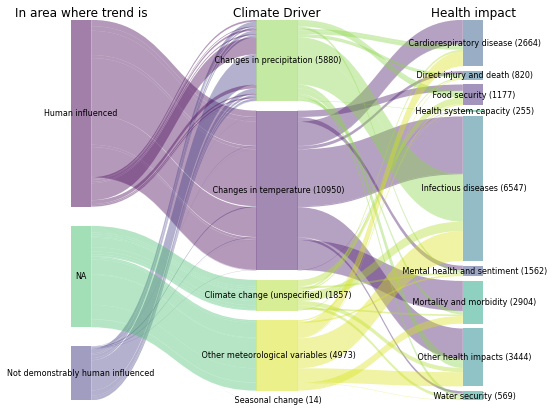

In [16]:
from mpl_sankey import sankey
import matplotlib.pyplot as plt
sdf = pd.DataFrame(data, columns=["Weight", "In area where trend is", "Climate Driver", "Health impact"])
plt.figure(figsize=(7.4, 7))
sankey(sdf, cmap=plt.get_cmap('viridis'),labels_size=8, titles_size=12)

In [20]:
import re
import numpy as np
clim = [x for x in attrib_df.columns if re.match("2 -",x) or re.match("5 -",x)]
health = [x for x in attrib_df.columns if re.match("3 -",x) or re.match("6 -",x)]
links = []
mat = np.zeros((len(clim),len(health)))
data = []
for i, c in enumerate(clim):
    cn = df[df[c]>=0.5].shape[0]
    for j, h in enumerate(health):
        hn = df[df[h]>=0.5].shape[0]
        chdf = df[
            (df[c]>=0.5) &
            (df[h]>=0.5)
        ]
        if c in attrib_drivers:
            n = chdf[chdf[attrib_dict[c]]>=0.1].shape[0]
            data.append([
                n,
                "Human influenced",
                f"{c.split('.')[2]} ({cn})",
                f"{h.split('.')[2]} ({hn})",
            ])
            n = chdf[chdf[attrib_dict[c]]<0.1].shape[0]
            data.append([
                n,
                "Not demonstrably human influenced",
                f"{c.split('.')[2]} ({cn})",
                f"{h.split('.')[2]} ({hn})",
            ])
        else:
            data.append([
                chdf.shape[0],
                "NA",
                f"{c.split('.')[2]} ({cn})",
                f"{h.split('.')[2]} ({hn})",
            ])      

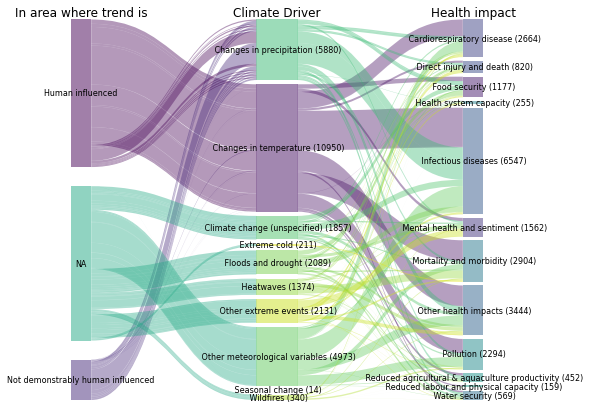

In [21]:
from mpl_sankey import sankey
import matplotlib.pyplot as plt
sdf = pd.DataFrame(data, columns=["Weight", "In area where trend is", "Climate Driver", "Health impact"])
plt.figure(figsize=(7.4, 7))
sankey(sdf, cmap=plt.get_cmap('viridis'),labels_size=8, titles_size=12)